# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

And now we can import this package like so:

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [ ]:
# path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 1/Resources/sample_sales_data.csv"
path = "sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [ ]:
df.tail()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


### Checking Data Types

In [ ]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

Besides `unit_price`, `quantity`, and `total` all the features are `object` type, but looking on `timestamp` values it's a datetime format

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [ ]:
df = convert_to_datetime(df, 'timestamp')

In [ ]:
df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

### Missing Values

In [ ]:
df[df.isna()].sum()

<ipython-input-11-fabec1f99dd5>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.isna()].sum()


transaction_id      0
product_id          0
category            0
customer_type       0
unit_price        0.0
quantity          0.0
total             0.0
payment_type        0
dtype: object

There are no missing values

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

In [ ]:
def plot_categorical_distribution_bar(data: pd.DataFrame = None, x: str = None, y: str = None, height: int = 8, aspect: int = 2):
  _ = sns.barplot(data=data, x=x, y=y, estimator=sum).set(title=f'Distribution of {x} on {y}');

In [ ]:
int_col = [col for col in df if df[col].dtype == 'int64']
float_col = [col for col in df if df[col].dtype == 'float64']
cat_col = [col for col in df if col not in int_col and col not in float_col]

print(f'int_col: {int_col}')
print(f'float_col: {float_col}')
print(f'cat_col: {cat_col}')

int_col: ['quantity']
float_col: ['unit_price', 'total']
cat_col: ['transaction_id', 'timestamp', 'product_id', 'category', 'customer_type', 'payment_type']


### Categorical Columns

In [ ]:
for c in cat_col:
    get_unique_values(df, c)

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64
Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64
Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9   

`transaction_id` as expected all values are unique because it acts as identifier of the data so it will not be used in the future process

`product_id` `ecac012c-1dec-41d4-9ebd-56fb7166f6d9` is the most transactions

`category` `fruit` is the most transactions

`customer_type` and `payment_type` have even distribution for each type in transactions

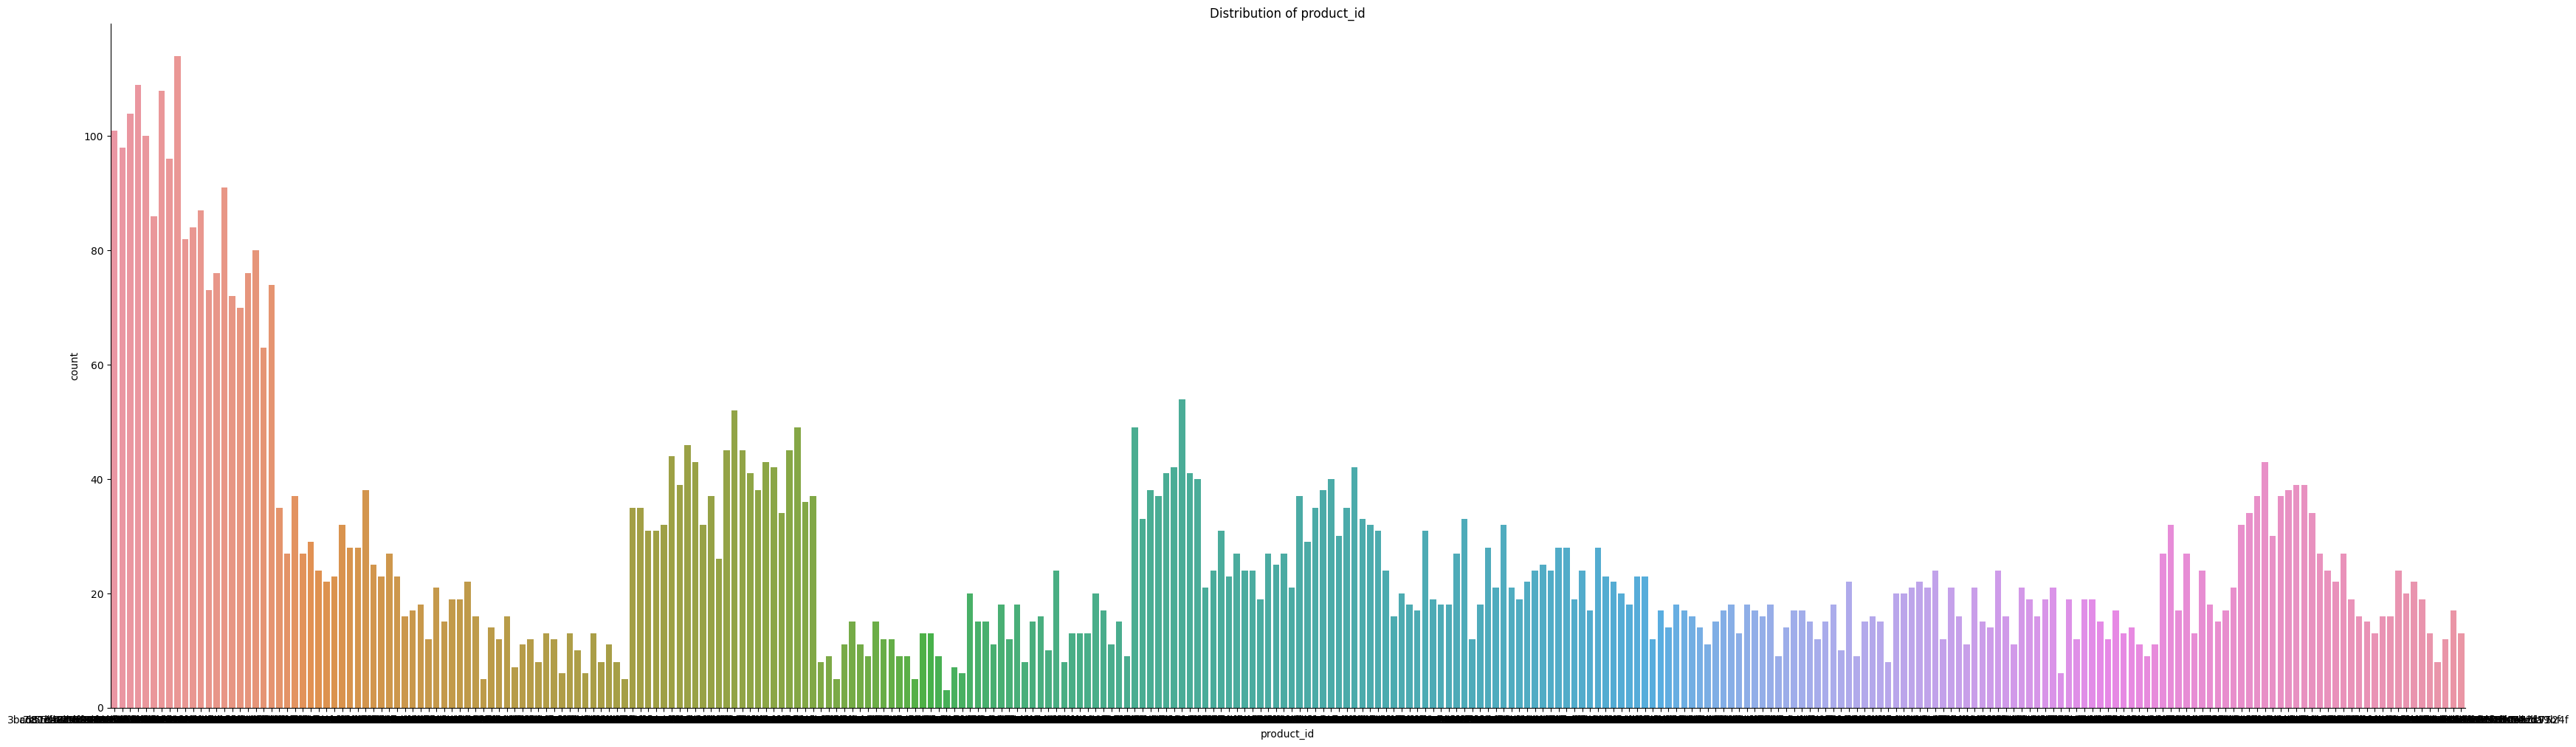

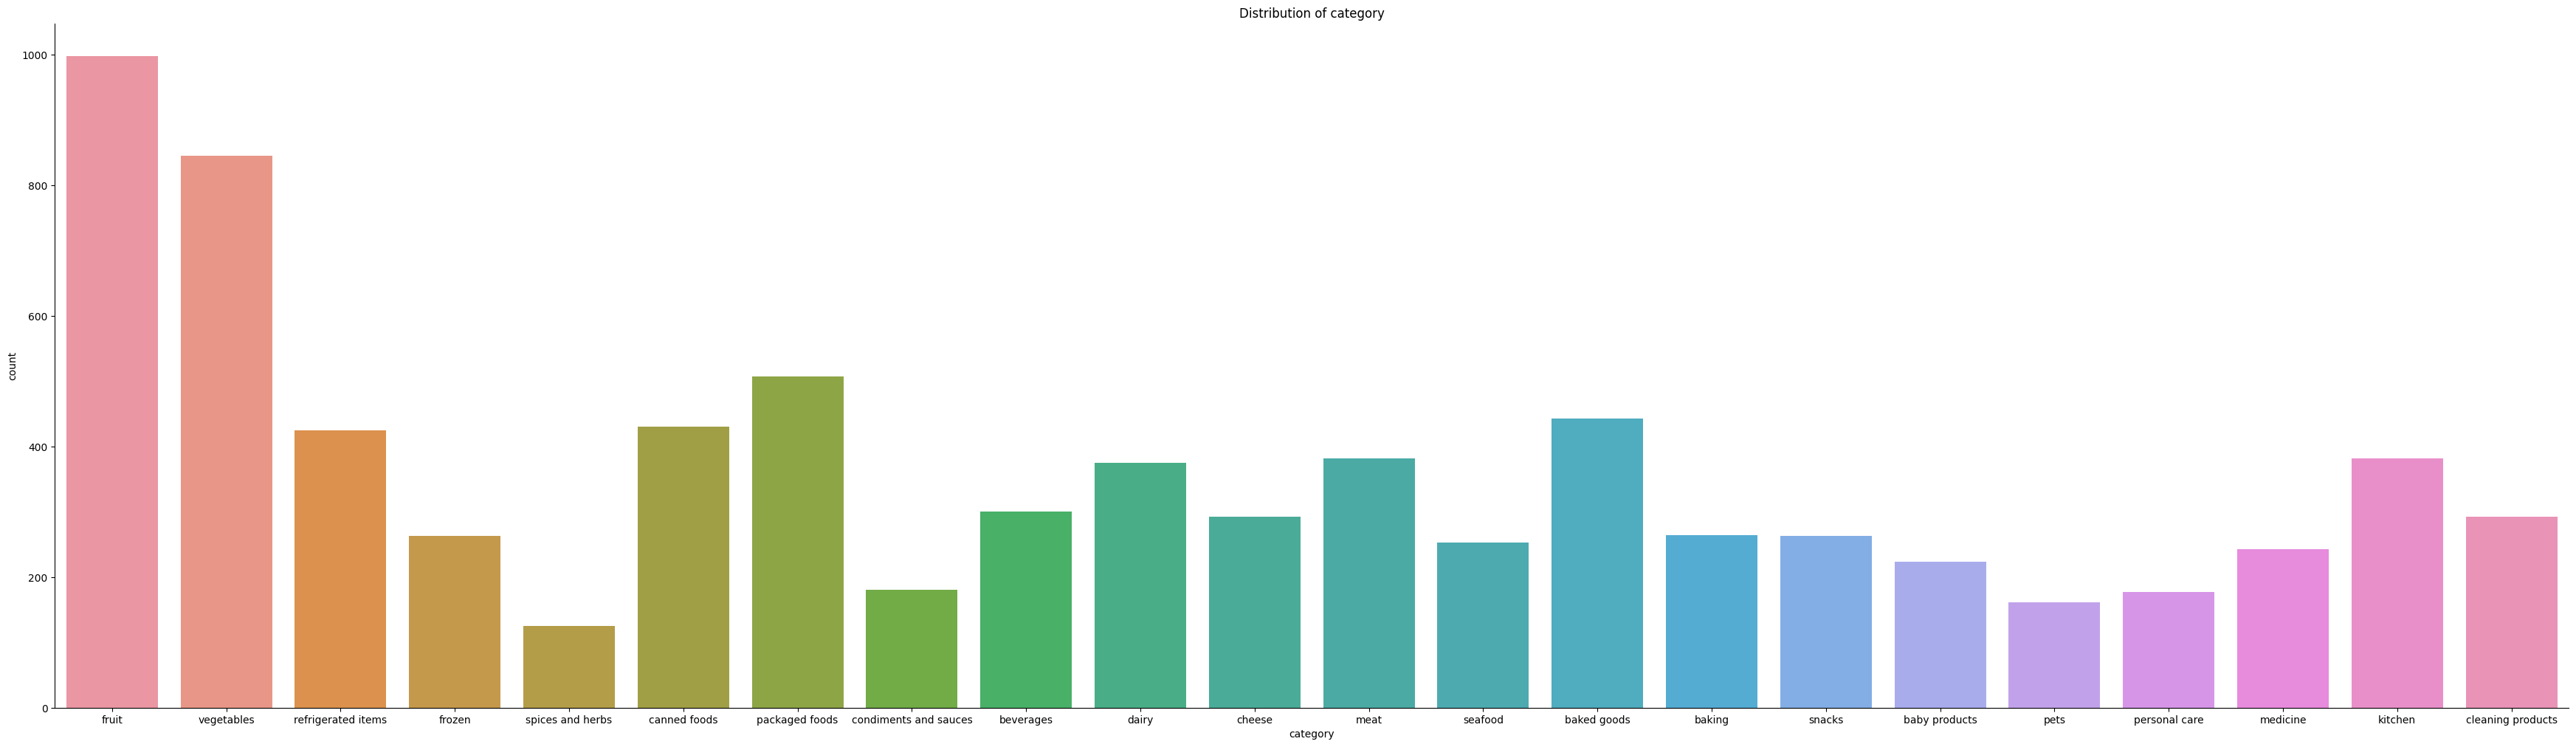

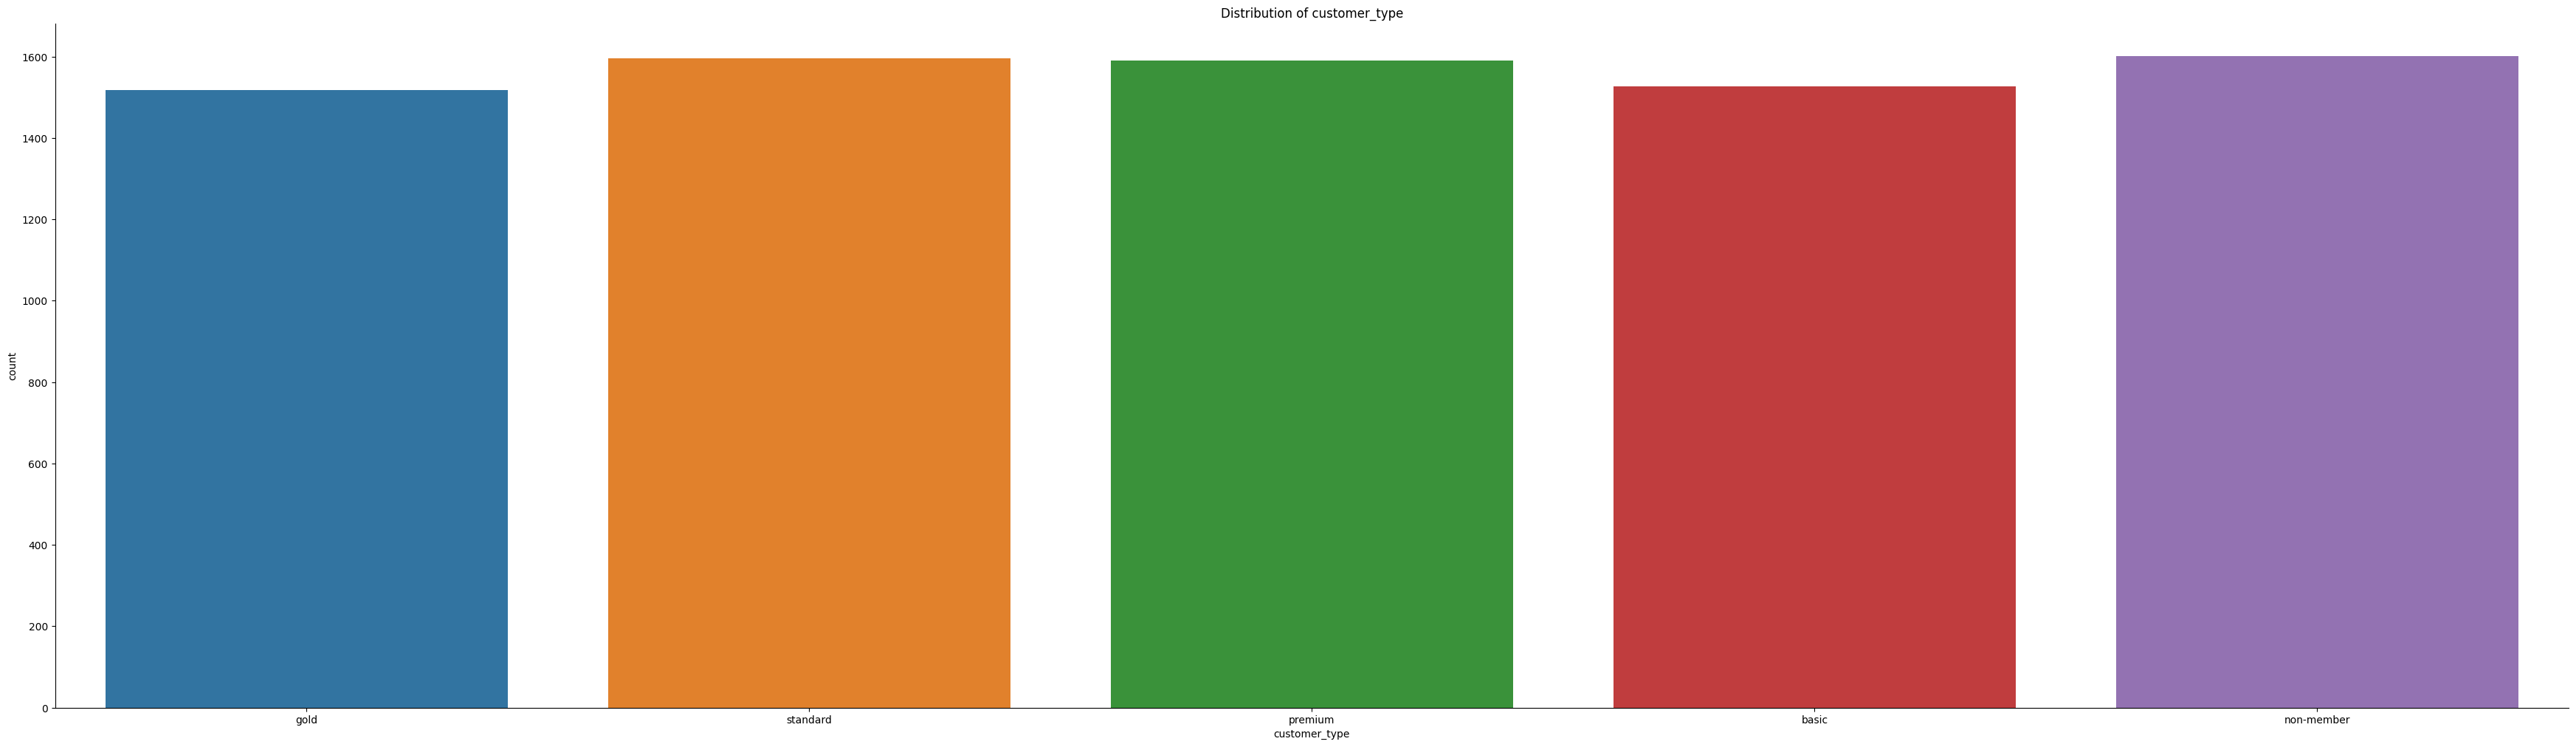

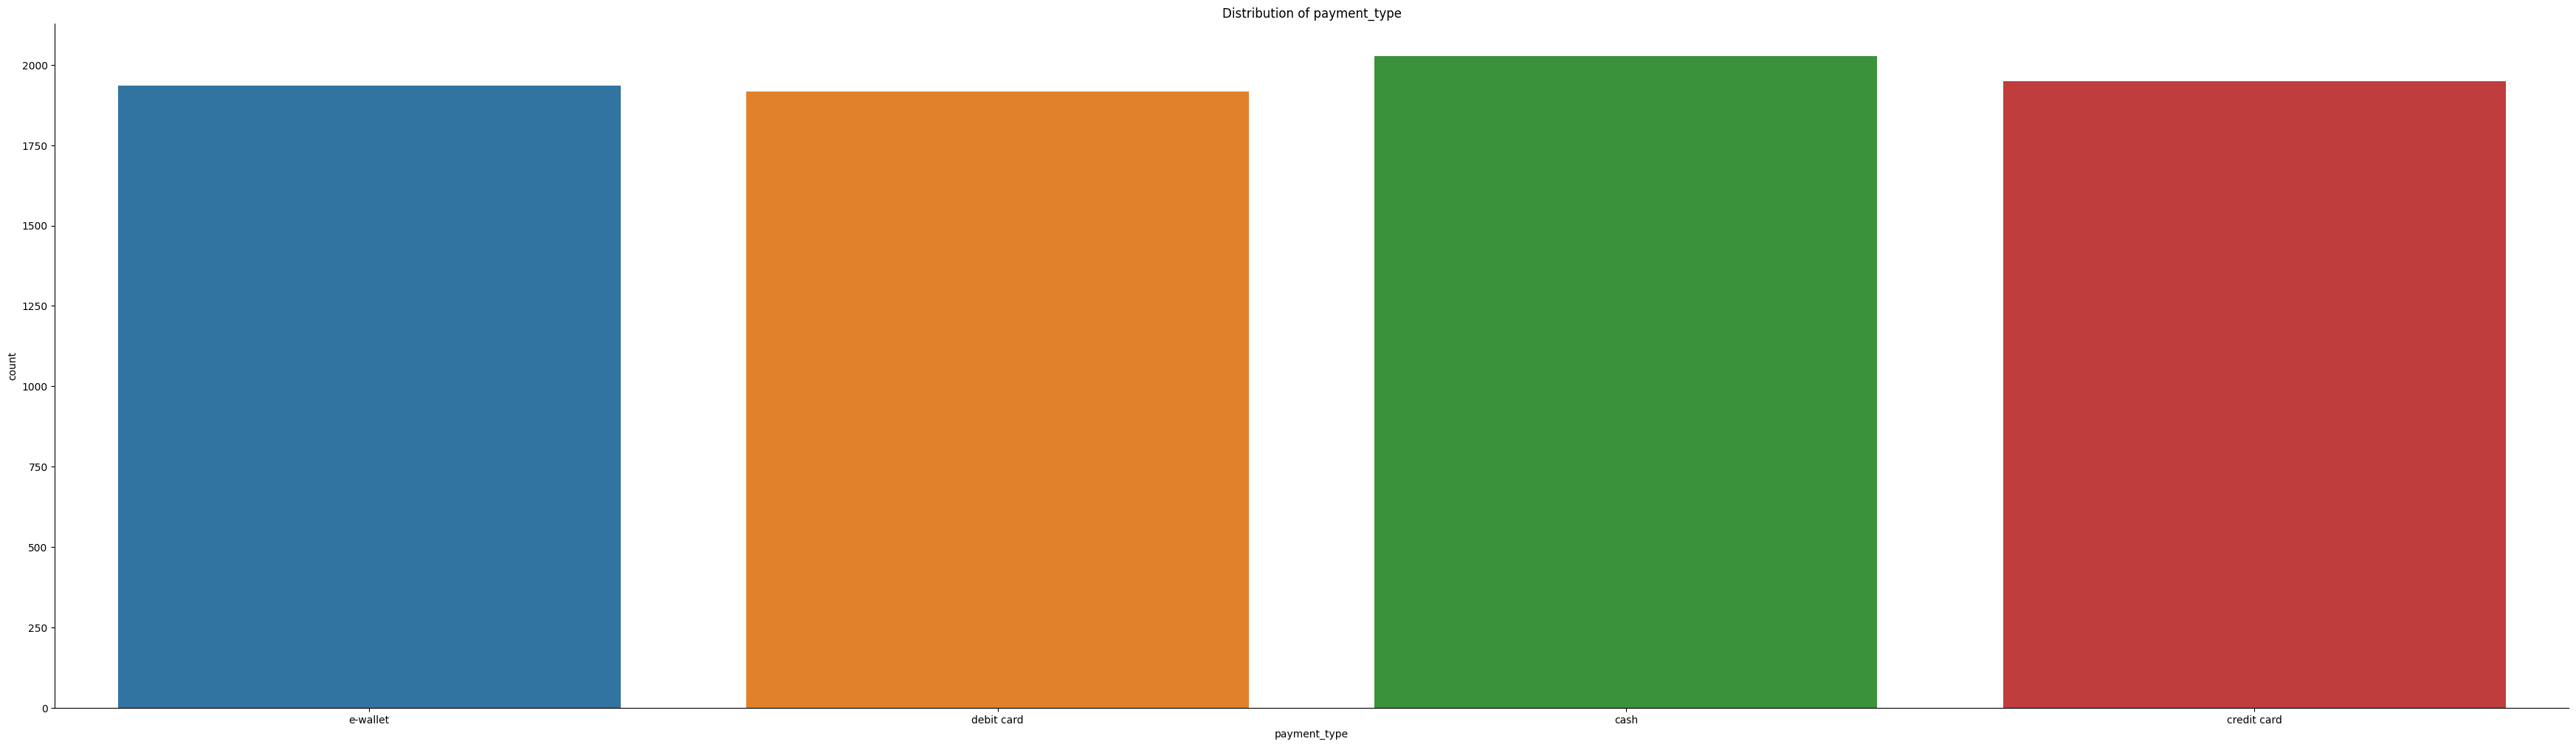

In [ ]:
for c in cat_col:
    if c != 'timestamp' and c != 'transaction_id':
        plot_categorical_distribution(df, c, 10, 3.5)

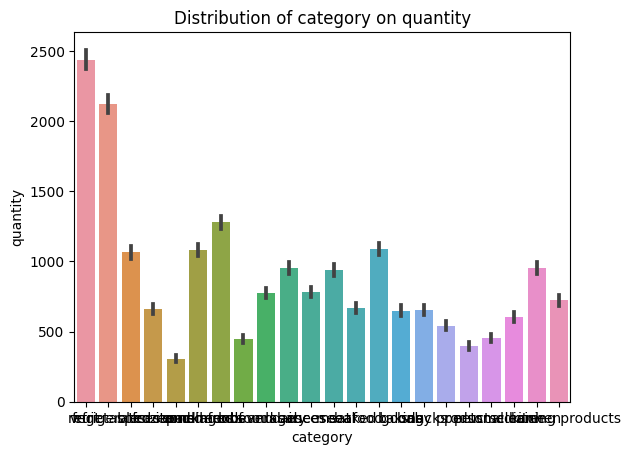

In [ ]:
# ['transaction_id', 'timestamp', 'product_id', 'category', 'customer_type', 'payment_type']
plot_categorical_distribution_bar(df, 'category', 'quantity')

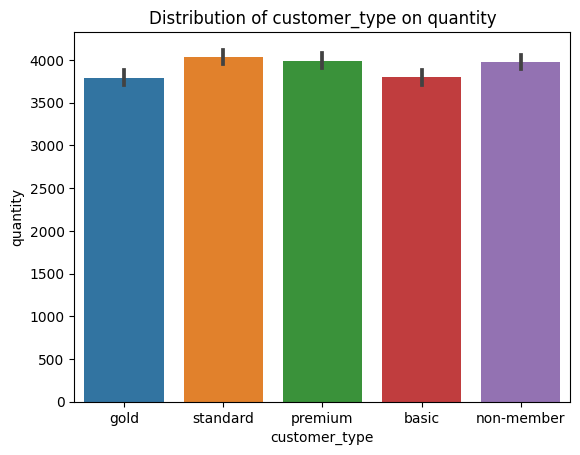

In [ ]:
plot_categorical_distribution_bar(df, 'customer_type', 'quantity')

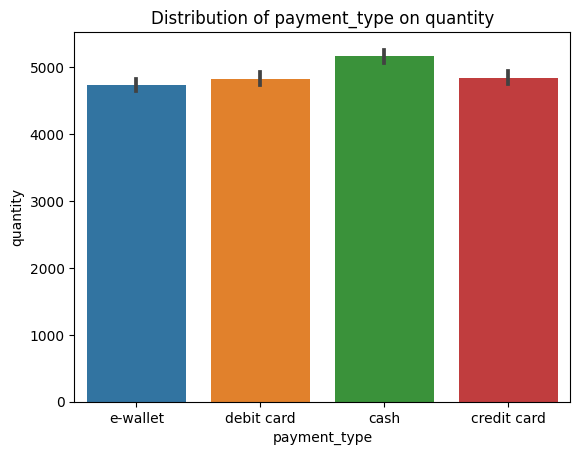

In [ ]:
plot_categorical_distribution_bar(df, 'payment_type', 'quantity')

### Datetime Columns

In [ ]:
print(f"min timestamp: {df['timestamp'].min()}")
print(f"max timestamp: {df['timestamp'].max()}")
print(len(df))

min timestamp: 2022-03-01 09:00:13
max timestamp: 2022-03-07 19:59:54
7829


The date range consist of 1 week data with 7829 entries. Since the date range is small, let's try break down the datetime range in hour

In [ ]:
df['hour'] = df['timestamp'].dt.hour

In [ ]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


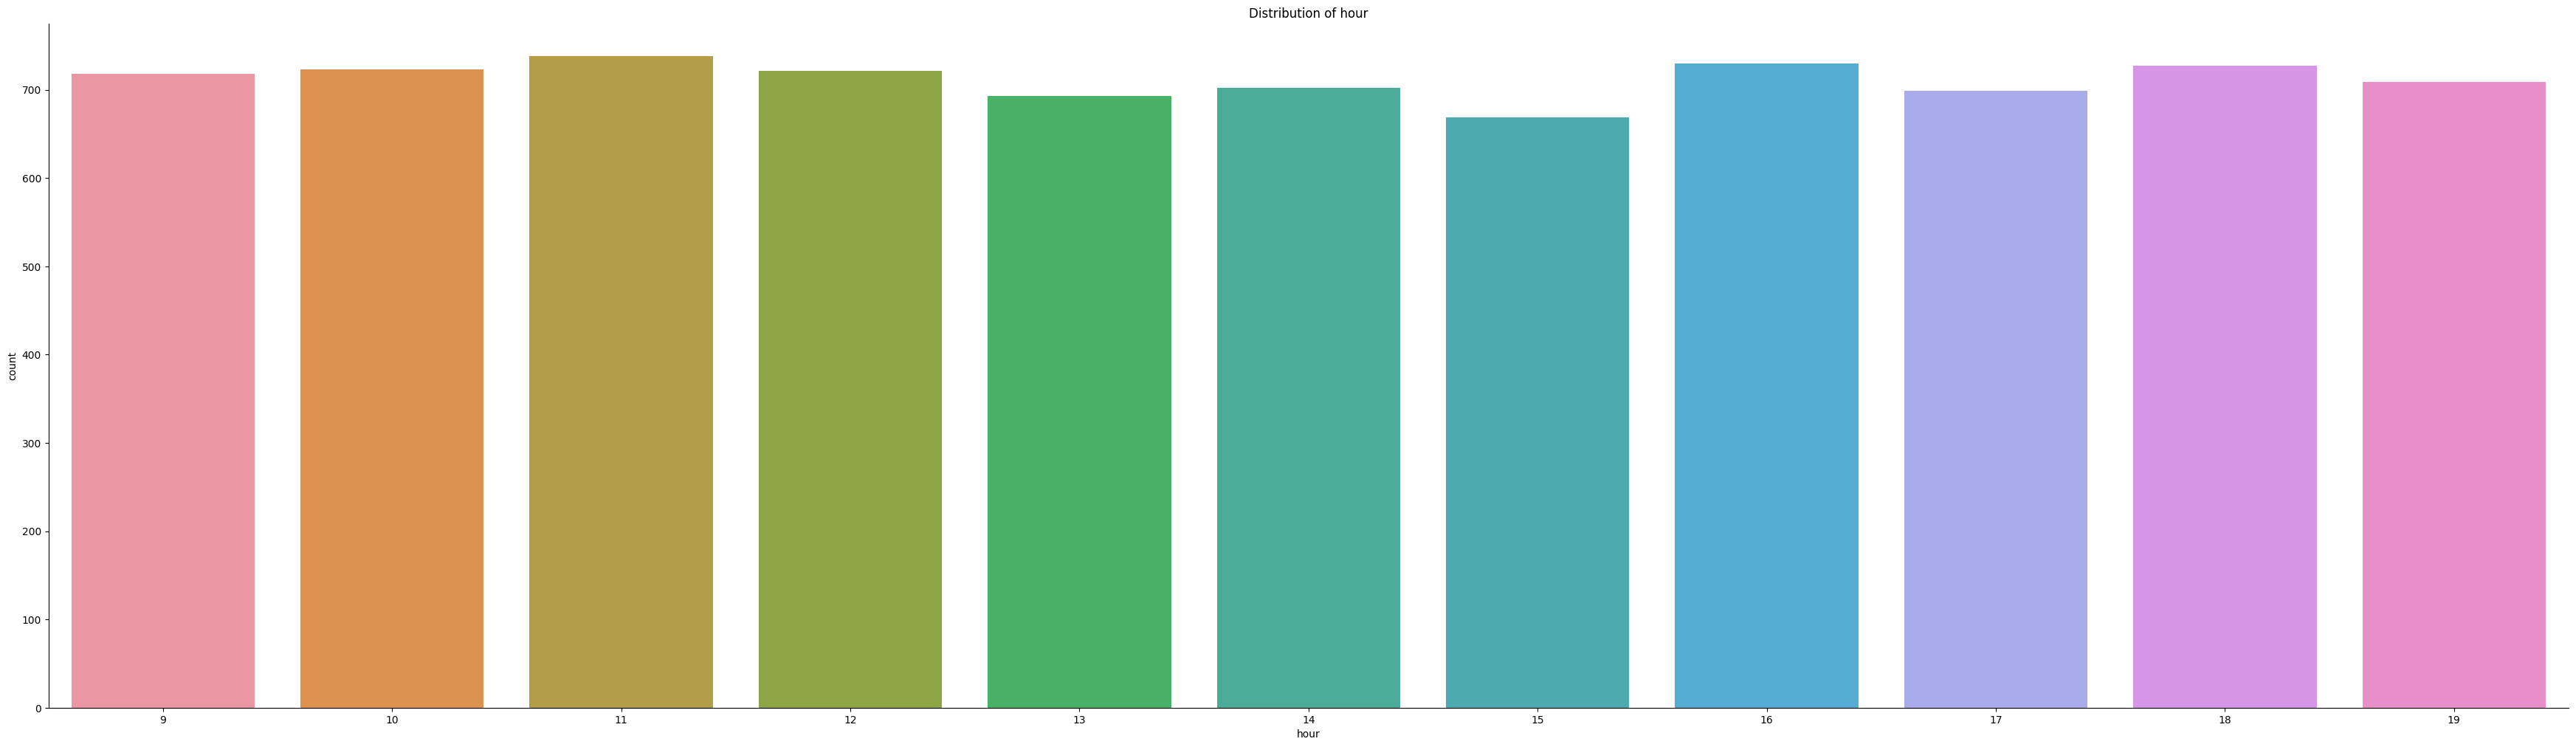

In [ ]:
plot_categorical_distribution(df, 'hour', 10, 3.5)

It's more or less have same distribution of transactions in recorded hour

### Numeric Columns

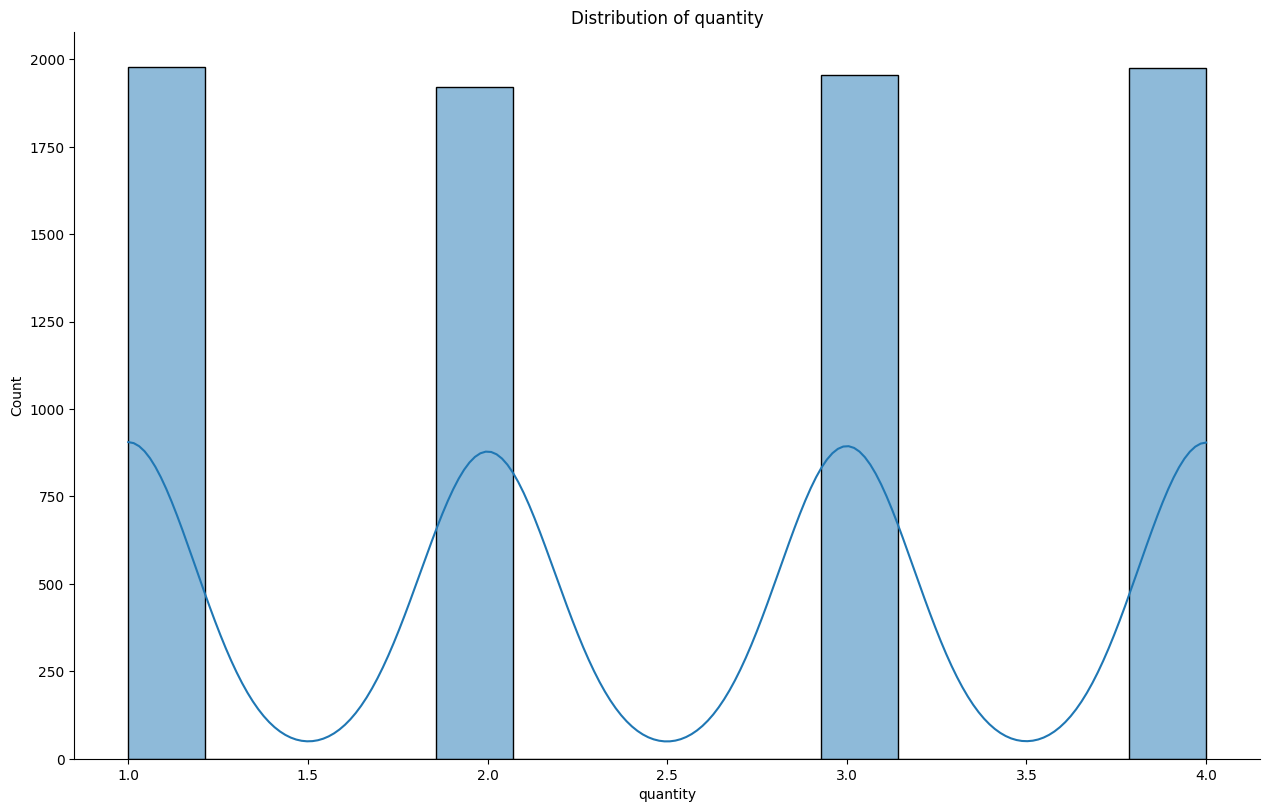

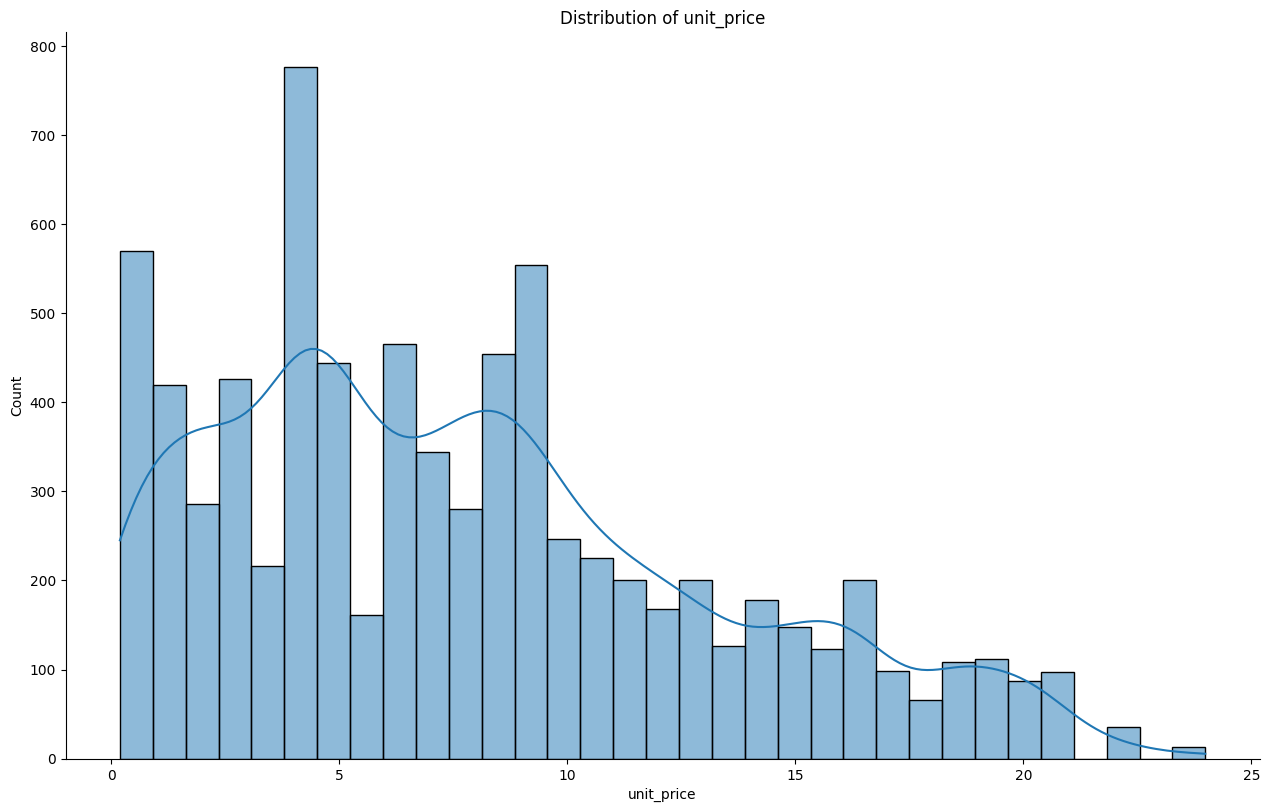

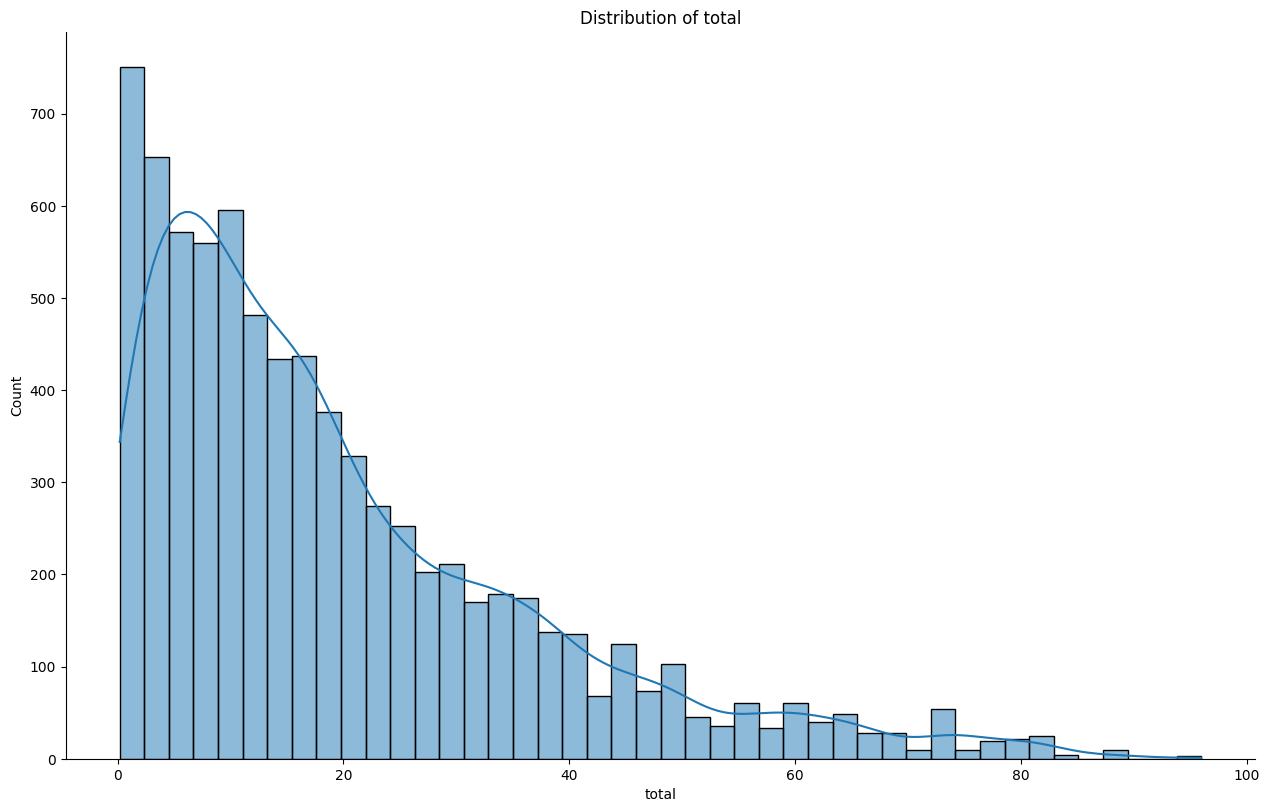

In [ ]:
for c in int_col + float_col:
    plot_continuous_distribution(df, c)

`quantity` is even distributed with range 1 to 4 per transactions

`unit_price` is skewed to the lower values, it's as expected because there will be more transactions on cheaper things rather than the expensive one

`total` is skewed to the lower values like `unit_price`, it's as expected because `total` = `quantity` * `unit_price`, with `quantity` even distributed and `unit_price` is skewed to the left

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-32-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


Because `total` = `quantity` * `unit_price` it's as expected `total` has some correlation to `unit_price` and `quantity`

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

